#### AirBnB Seattle

The Data will be explored implementing the Cross-Industry Standard Process for Data Mining (CRISP-DM) process as follows.

- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

Deployment is in the form of a blog post targeted at a general audience published in Github Repository ReadMe file.

##### Business Understanding

As per the AirBnB Listings atrribute level information available, following Business questions are framed to be answered thorugh the Data Analysis using CRISP-DM process.


 Question 1. How to predict price of the new listing?
 
 Question 2. What are the most important features driving the listing price?
 
 Question 3. Which ML technique will be most suitable for the price detection based on the available data?
 


##### Data Understanding & Preparation :
- What information we have?
- What information is missing?
- Initial data preparation
  - remove the irrelevant information
  - reformat the information and impute missing values
- High level analysis:
  - find out high level trends and correlations
- Prepare Exploratory Data Analysis
- Use Machine learning for Price Prediction

In [13]:
# listing dataset has the price and listing attributes level information
import pandas as pd
import numpy as np
listing = pd.read_csv("C://Users//CHANGKE7//OneDrive - Novartis Pharma AG//Udacity//Data Science//seattle//listings.csv")
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [33]:
df1 = pd.DataFrame(listing.isnull().sum()).reset_index()
df1

,index,0
0,id,0
1,listing_url,0
2,scrape_id,0
3,last_scraped,0
4,name,0
5,summary,177
6,space,569
7,description,0
8,experiences_offered,0
9,neighborhood_overview,1032


In [41]:
df1.columns

Index(['label', 0], dtype='object')

In [43]:
df1.rename(columns={"index":"label",0:"NMiss"}, inplace=True)

In [51]:
# find variables with more than 20% missing
df1['NMiss_p']= df1['NMiss']/3818
dlist = df1.query("NMiss_p >=0.2").label.tolist()
dlist

['neighborhood_overview',
 'notes',
 'transit',
 'host_about',
 'host_acceptance_rate',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'license']

In [50]:
# droping columns with more than 20% missing 
# as imputing high missing values by mean or zeros could result in misclassification of the information
listing.drop(dlist,axis=1,inplace=True)

In [53]:
# summary of character variables
listing.describe(include=["O"])

,listing_url,last_scraped,name,summary,space,description,experiences_offered,thumbnail_url,medium_url,picture_url,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3818,3818,3641,3249,3818,3818,3498,3498,3818,...,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3818,1,3792,3478,3119,3742,1,3498,3498,3818,...,1,1,984,321,1,1,2,3,2,2
top,https://www.airbnb.com/rooms/1455269,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,https://a0.muscache.com/ac/pictures/104330368/...,https://a0.muscache.com/im/pictures/95692892/6...,https://a2.muscache.com/ac/pictures/f1e1c350-c...,...,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,1,3818,3,15,14,10,3818,1,1,1,...,3818,3818,25,94,3818,3818,3227,1417,3497,3443


In [64]:
listing.select_dtypes(include=['object']).columns.tolist()

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'price',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',
 'jurisdiction_names',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [68]:
# value counts of some important variables
imp_column = [ 'property_type','room_type','bed_type','cancellation_policy','instant_bookable']
for x in imp_column:
    print(listing[x].value_counts())

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64
Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64
Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64
strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64
f    3227
t     591
Name: instant_bookable, dtype: int64


In [80]:
listing['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [91]:
# recoding property type variable
list1 = ['Bed & Breakfast','Other','Cabin','Camper/RV','Bungalow','Boat','Tent','Treehouse','Dorm','Chalet','Yurt']
listing['property_type'] = listing['property_type'].apply(lambda x: 'other_prop_type' if x in list1 else x) 

In [92]:
listing['property_type'].value_counts()

House              1733
Apartment          1708
other_prop_type     127
Townhouse           118
Condominium          91
Loft                 40
Name: property_type, dtype: int64

In [70]:
listing['amenities'].head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [72]:
# all variable missing values
listing.isnull().sum().sort_values(ascending=False)

review_scores_accuracy            658
review_scores_checkin             658
review_scores_value               656
review_scores_location            655
review_scores_cleanliness         653
review_scores_communication       651
review_scores_rating              647
first_review                      627
last_review                       627
reviews_per_month                 627
space                             569
host_response_rate                523
host_response_time                523
neighbourhood                     416
thumbnail_url                     320
medium_url                        320
xl_picture_url                    320
host_neighbourhood                300
summary                           177
bathrooms                          16
host_location                       8
zipcode                             7
bedrooms                            6
host_since                          2
host_thumbnail_url                  2
host_is_superhost                   2
host_picture

In [74]:
# fill 0 for beds, bedrooms and bathrooms
listing.beds.fillna(0,inplace=True)
listing.bedrooms.fillna(0,inplace=True)
listing.bathrooms.fillna(0,inplace=True)

In [145]:
print('Avg no. of bedroom are {0:.2f}'.format(listing.bedrooms.mean()),
     ' , Avg no. of bathrooms are {0:.2f}'.format(listing.bathrooms.mean()),
     '& Avg no of guests are {0:.2f}'.format(listing.accommodates.mean()))

Avg no. of bedroom are 1.31  , Avg no. of bathrooms are 1.25 & Avg no of guests are 3.35


In [98]:
listing.bedrooms.mean()

1.3056574122577265

In [93]:
listing.to_pickle("C://Users//CHANGKE7//OneDrive - Novartis Pharma AG//Udacity//Data Science//seattle//listing1.pkl")

In [298]:
listing=pd.read_pickle("C://Users//CHANGKE7//OneDrive - Novartis Pharma AG//Udacity//Data Science//seattle//listing1.pkl")

In [299]:
# recode a few categorical variables
dict1 = {'t': 1, 'f': 0}
listing['host_has_profile_pic'] = listing['host_has_profile_pic'].replace(dict1)
listing['host_identity_verified'] = listing['host_identity_verified'].replace(dict1)
listing['instant_bookable'] = listing['instant_bookable'].replace(dict1)

In [191]:
listing['bed_type'].value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

In [300]:
# recode bed type
list2 = ['Futon','Pull-out Sofa','Airbed','Couch']
listing['bed_type'] = listing['bed_type'].apply(lambda x: 'other_bed_type' if x in list2 else x) 

In [301]:
# One-hot encoding for some variables
list3=['room_type', 'property_type', 'bed_type', 'cancellation_policy']
dummies = pd.get_dummies(listing[list3])
listing=pd.concat([listing,dummies],axis=1)


In [302]:
listing.shape

(3818, 95)

In [303]:
# recode 'Amenities' variable
listing.loc[listing['amenities'] == '{}','amenities'].value_counts()

{}    45
Name: amenities, dtype: int64

In [304]:
# recoding missing
listing.loc[listing['amenities'] == '{}','amenities'] = " "

In [196]:
listing.amenities.head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [305]:
for i in range(listing.shape[0]):
    listing['amenities'][i]=listing['amenities'][i].replace("{","").replace("}","").replace('"',"").replace(",","|")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [199]:
listing.to_pickle("C://Users//CHANGKE7//OneDrive - Novartis Pharma AG//Udacity//Data Science//seattle//listing2.pkl")

In [272]:
listing=pd.read_pickle("C://Users//CHANGKE7//OneDrive - Novartis Pharma AG//Udacity//Data Science//seattle//listing2.pkl")

In [306]:
amns=[]
for i in range(listing.shape[0]):
    amnseries=pd.Series(amns.append(listing['amenities'][i].split("|")))

In [307]:
amns1=[]
for i in range(len(amns)):
    amns2 = amns[i]
    for j in range(len(amns2)):
        amns1.append(amns2[j])
        

In [308]:
amnseries = pd.Series(amns1)
amnlist=amnseries.unique().tolist()


In [309]:
listing['amenities'][0]


'TV|Cable TV|Internet|Wireless Internet|Air Conditioning|Kitchen|Heating|Family/Kid Friendly|Washer|Dryer'

In [310]:
# create dataframe df with amenities flag as 1 for the particular amenity in the row
df=pd.DataFrame()
for i in range(listing.shape[0]):
    for value in amnlist:
        if listing['amenities'][i].split("|").count(value) > 0:
            df.loc[i,value]=1
        else:
            df.loc[i,value]=0

In [311]:
amenity_recode={
                'Air Conditioning':'Weather Control',
                'Indoor Fireplace':'Weather Control',
                'Heating':'Weather Control',
        
                'Carbon Monoxide Detector':'Safety Features',
                'Fire Extinguisher':'Safety Features',
                'First Aid Kit':'Safety Features',
                'Smoke Detector':'Safety Features',
                
                'Buzzer/Wireless Intercom':'Security Features',
                'Doorman':'Security Features',
                'Safety Card':'Security Features',
                'Lock on Bedroom Door':'Security Features',
                
                'Cat(s)':'Pet Friendly',
                'Dog(s)':'Pet Friendly',
                'Pets Allowed':'Pet Friendly',
                'Pets live on this property':'Pet Friendly',
                'Other pet(s)':'Pet Friendly',
                
                'Elevator in Building':'Access Friendly',
                'Wheelchair Accessible':'Access Friendly',
                
                'Essentials':'Essentials',
                'Hair Dryer':'Essentials',
                'Hangers':'Essentials',
                'Iron':'Essentials',
                'Shampoo':'Essentials',             
                
                'Cable TV':'TV',
                'TV':'TV',
                
                'Internet':'Internet',
                'Wireless Internet':'Internet',
                'Laptop Friendly Workspace':'Internet',
                
                'Dryer':'Laundry Facility',
                'Washer':'Laundry Facility',
                'Washer / Dryer':'Laundry Facility'}
    

In [312]:
df1=df.reset_index()
df1.head()

,index,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,...,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
# since multiple amenities are coded under one heading, grouping the flags for the headings
df_melt = df1.melt(id_vars=['index'], var_name='amenity')
df_melt['amenity'] = df_melt['amenity'].replace(amenity_recode)
df_melt_pivot = df_melt.pivot_table(
    index='index',
    columns='amenity',
    values='value', 
    aggfunc='max'
)

df_melt_pivot.shape


(3818, 20)

In [314]:
listing = pd.concat([listing,df_melt_pivot],axis=1)
listing.shape

(3818, 115)

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

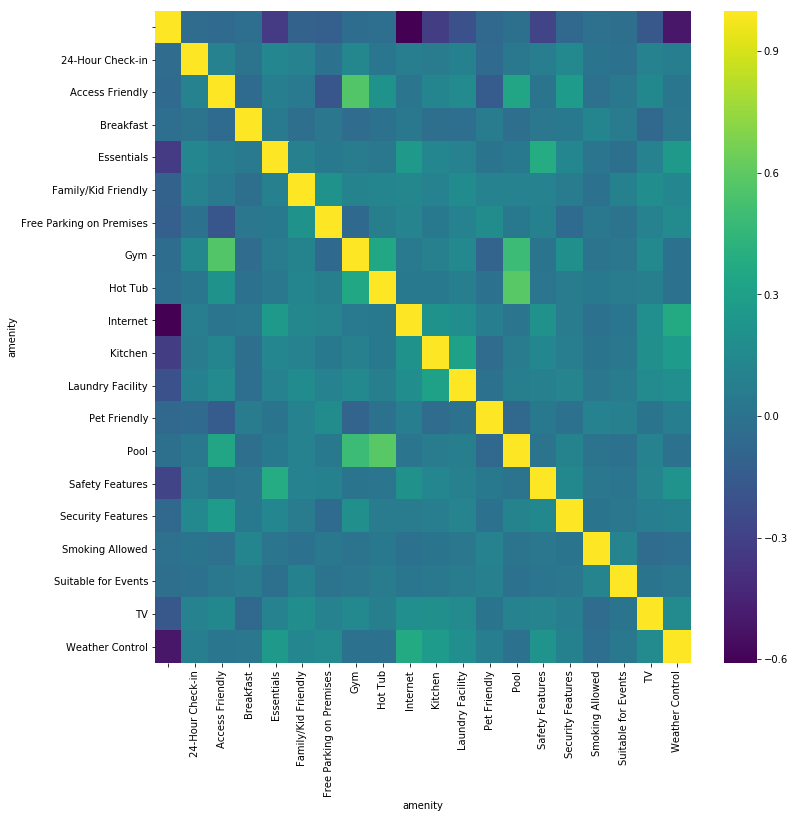

In [278]:
# correlation analysis among the amenities
fig = plt.figure(figsize= (12,12))
sns.heatmap(df_melt_pivot.corr(), annot=False, vmax=1, cmap='viridis', square=False)

In [315]:
for i in range(listing.shape[0]):
    listing['price'][i]=listing['price'][i].replace("$","").replace(",","")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [316]:
listing['price']=listing['price'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


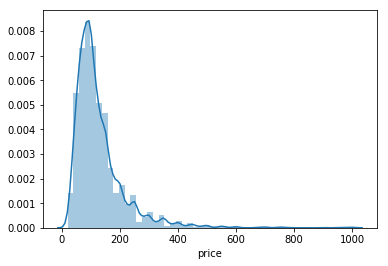

In [317]:
# price trends
sns.distplot(listing.price)

In [413]:
listing.price.mean()

127.97616553169199

In [415]:
listing.price.median()

100.0

In [318]:
listing.to_pickle("C://Users//CHANGKE7//OneDrive - Novartis Pharma AG//Udacity//Data Science//seattle//listing3.pkl")

In [321]:
len(list(listing.select_dtypes(include=['object']).columns))

49

In [322]:
listing.shape

(3818, 115)

In [323]:
list(listing.select_dtypes(include=['object']).columns)

['listing_url',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'amenities',
 'extra_people',
 'calendar_updated',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'requires_license',
 'jurisdiction_names',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [327]:
listing['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [330]:
# One-hot encoding for neighbourhood_group_cleansed
list4=['neighbourhood_group_cleansed']
dummies = pd.get_dummies(listing[list4])
listing=pd.concat([listing,dummies],axis=1)


In [331]:
list5=list(listing.select_dtypes(include=['object']).columns)
listing=listing.drop(list5,axis=1)
listing.shape

(3818, 83)

In [337]:
# droping irrelevant variables
list6=['id', 'scrape_id', 'host_id']
listing=listing.drop(list6,axis=1)

In [396]:
list7=['latitude','longitude']
listing=listing.drop(list7,axis=1)

In [338]:
listing.shape

(3818, 80)

In [332]:
list(listing.select_dtypes(include=['object']).columns)

[]

#### EDA Analysis:

- Price(target) has a right skewed distribution with median=100 and mean=127.
- House and Apartment are the most popular property types and rest all are grouped into Others.
- Real Bed is the most popular Bed type present in majority of the listings .
- Each property has an average of 1.3 bedrooms, 1.25 bathrooms and can accommodate an average of 3.3 guests.
- There are a total of 42 unique amenities offered across listings and there is no correlation among the amenity groups.

### Model Develpment

#### Price Prediction

In order to predict price we will use ML technique for the model development. Since we have some variables with missing values even after droping a few of them, we will use XGBOOST ML technique which has inbuilt functionality to take care of the missing data. Also the boosting algorithm is expected to return good predictions subjected to the fine tuning methods of its different hyperparameters.

##### XGBOOST Hyperparameter Tuning

We will use Grid Search Cross validation approach to fine tune the model.

In [334]:
!pip install xgboost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [335]:
import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

In [397]:
#prepare train and test datasets for modelling
TEST_SIZE = 0.3
RAND_STATE = 42

X = listing.drop(columns = 'price')
y = listing[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [343]:
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [398]:
# tune for max depth and min child weight
param_test1 = {
 'max_depth':[2,4,6,8,10],
 'min_child_weight':[1,3,5,7]
}
gsearch1 = GridSearchCV(estimator = xgboost.XGBRegressor( learning_rate =0.1, n_estimators=100, gamma=0, subsample=0.8, 
colsample_bytree=0.8,objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

[21:21:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


([mean: 0.56960, std: 0.06246, params: {'max_depth': 2, 'min_child_weight': 1},
  mean: 0.57328, std: 0.06457, params: {'max_depth': 2, 'min_child_weight': 3},
  mean: 0.56906, std: 0.06385, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.57208, std: 0.06589, params: {'max_depth': 2, 'min_child_weight': 7},
  mean: 0.57795, std: 0.06613, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: 0.56886, std: 0.05154, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: 0.57231, std: 0.05875, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.58509, std: 0.06406, params: {'max_depth': 4, 'min_child_weight': 7},
  mean: 0.57673, std: 0.06642, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: 0.56971, std: 0.05820, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: 0.56072, std: 0.05953, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.56754, std: 0.06203, params: {'max_depth': 6, 'min_child_weight': 7},
  mean: 0.56604, std: 0.05568, params: {

In [400]:
# tune for gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = xgboost.XGBRegressor( learning_rate =0.1, n_estimators=100, max_depth=4,
 min_child_weight=7, subsample=0.8, colsample_bytree=0.8,
 objective=  'reg:linear', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

[21:24:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


([mean: 0.58509, std: 0.06406, params: {'gamma': 0.0},
  mean: 0.58509, std: 0.06406, params: {'gamma': 0.1},
  mean: 0.58509, std: 0.06406, params: {'gamma': 0.2},
  mean: 0.58509, std: 0.06406, params: {'gamma': 0.3},
  mean: 0.58509, std: 0.06406, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.5850884879987162)

In [401]:
# tune for subsample and colsample_bytree
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = xgboost.XGBRegressor( learning_rate =0.1, n_estimators=79, max_depth=4,
 min_child_weight=7, gamma=0, 
 objective= 'reg:linear', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

[21:28:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


([mean: 0.58044, std: 0.05821, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.58360, std: 0.06195, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.57602, std: 0.06483, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.57819, std: 0.06334, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.58018, std: 0.06403, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.57640, std: 0.06915, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.58205, std: 0.06359, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.57693, std: 0.06639, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.57721, std: 0.06057, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.58945, std: 0.06343, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.58241, std: 0.06432, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.57449, std: 0.06040, params: {'colsample_bytree': 0.8, 'subsample'

In [402]:
# tune for learning rate
param_test4 = {
 'learning_rate':[0.05,0.07,0.09]
 
}
gsearch4 = GridSearchCV(estimator = xgboost.XGBRegressor( n_estimators=100, max_depth=4,
 min_child_weight=7, gamma=0, subsample=0.7, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

[21:31:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


([mean: 0.57821, std: 0.05587, params: {'learning_rate': 0.05},
  mean: 0.58694, std: 0.06435, params: {'learning_rate': 0.07},
  mean: 0.58851, std: 0.06290, params: {'learning_rate': 0.09}],
 {'learning_rate': 0.09},
 0.5885077660253011)

In [403]:
# fit the best hyperparameters
xgb1 = xgboost.XGBRegressor(
 learning_rate =0.09,
 n_estimators=100,
 max_depth=4,
 min_child_weight=7,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [411]:
# model performance on training data
xgb1.fit(X_train, y_train,eval_metric='rmse')
dtrain_predictions = xgb1.predict(X_train)
print("Mean Absolute Error for Train: %.4g" % metrics.mean_absolute_error(y_train.values, dtrain_predictions))

[21:41:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error for Train: 26.4


In [412]:
# model performance on test data
xgb1.fit(X_test, y_test,eval_metric='rmse')
dtest_predictions = xgb1.predict(X_test)
print("Mean Absolute Error for Test : %.4g" % metrics.mean_absolute_error(y_test.values, dtest_predictions))

[21:41:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error for Test : 22.89


#### Model Evaluation

Mean Absolute Error for Train & Test is 26 & 23. Since the model is fine tuned and performance is similar on development and validation data, we can use the model to predict the price for new listing provided the availability of 77 listing attributes which have been used in the model development.

In [407]:
feat_imp = pd.Series(xgb1.get_booster().get_score()).sort_values(ascending=False)

Text(0,0.5,'Feature Importance Score')

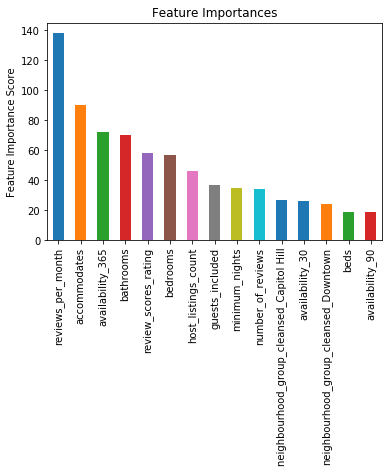

In [408]:
feat_imp[:15].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

#### Top 15 Important features determining Listing Price 

- Reviews per Month
- No.of Accomodates
- Availablity in 365 days
- No. of Bathrooms
- Reviews score rating
- No. of Bedrooms
- No. of Host Listings
- No. of Guests
- Minimum Nights Stay
- No. of Reviews
- Capitol Hill as the Neighbourhood
- Availablity in 30 days
- Downtown as the Neighbourhood
- No. of Beds
- Availablity in 90 days